Modules nécessaires : 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

from HiggsML.ingestion import Ingestion
from HiggsML.datasets import download_dataset
from sample_code_submission.neural_network import NeuralNetwork
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

Charger les données : 

In [2]:
data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

# load train set
data.load_train_set()
data_set = data.get_train_set()

2025-06-04 15:51:08,710 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-04 15:51:08,710 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A
2025-06-04 15:51:08,710 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-04 15:51:08,726 - HiggsML.datasets     - INFO     - Test size: 600000
2025-06-04 15:51:08,782 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-04 15:51:09,751 - HiggsML.datasets     - INFO     - Data loaded successfully


In [3]:
target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)

Direction

In [4]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\marwa\Desktop\Neural Network\Higgs_collaboration_A


Import Submission Model

In [5]:
path.append(submission_dir)
from model import Model

Testing Settings

In [6]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42


In [7]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

Boucle sur "Ingestion" en faisant varier epochs

Fonction bouclée: 

Significance

In [ ]:

def optimization(train_data): 
    L_batchsize = [8,16,32,64,128,256,512,1024,2048]
    sigmax = 0
  
    for k in range(len(L_batchsize)):
        ingestion = Ingestion(data)
        # initialize submission
        ingestion.init_submission(Model, "NN")
        ingestion.model.model.batchsize = L_batchsize[k]
        print(ingestion.model.model.batchsize)
        ingestion.fit_submission()
        sig1 = ingestion.model.model.significance_2(test_labels=ingestion.model.training_set["labels"],test_weights=ingestion.model.training_set["weights"])
        #visualisation des données :
        if sig1>sigmax: 
            sigmax = sig1
            batchsize_max = L_batchsize[k]
    return sigmax, batchsize_max



Il y a plusieurs problématique : 
Comment modifier une variable epochs de notre 

Lancement de la boucle

2025-06-04 15:51:11,312 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:51:11,327 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:51:11,707 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:51:11,723 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  667.9701351480165
sum_bkg_weights:  105051.02986485201


2025-06-04 15:51:12,087 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:51:12,109 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  675.8864086074748
sum_bkg_weights:  105043.11359139248


2025-06-04 15:51:12,508 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:51:12,675 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  676.3420453540351
sum_bkg_weights:  105042.65795464595
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
8
Epoch 1/5
6250/6250 - 13s - 2ms/step - accuracy: 0.7956 - loss: 1.9985
Epoch 2/5
6250/6250 - 12s - 2ms/step - accuracy: 0.8111 - loss: 1.9154
Epoch 3/5
6250/6250 - 11s - 2ms/step - accuracy: 0.8152 - loss: 1.8886
Epoch 4/5
6250/6250 - 12s - 2ms/step - accuracy: 0.8161 - loss: 1.8710
Epoch 5/5
6250/6250 - 12s - 2ms/step - accuracy: 0.8173 - loss: 1.8589
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step
predictions.shape: (45822,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45822,)
score shape after threshold (45822,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step
predictions.shape: (45822,)
labels.shape: ()
weights.shape: ()
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step
predictions.shape: (45822,)
labels.shape: ()
weights.shape: ()
saved_info {'beta

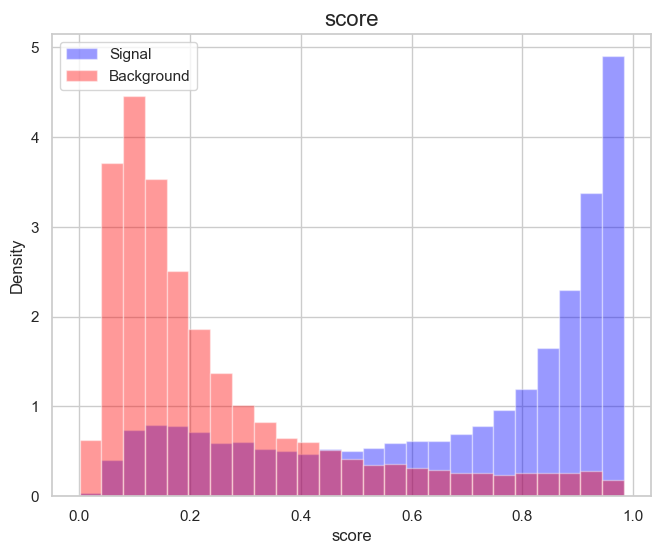

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


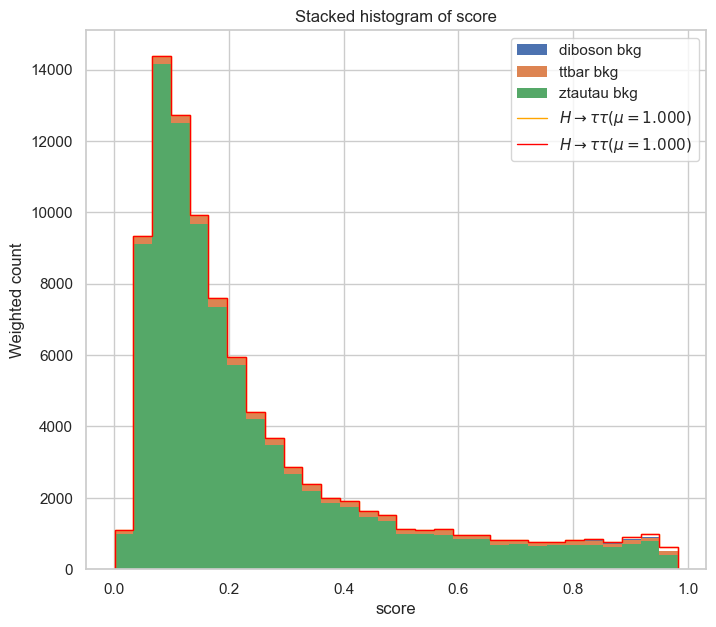

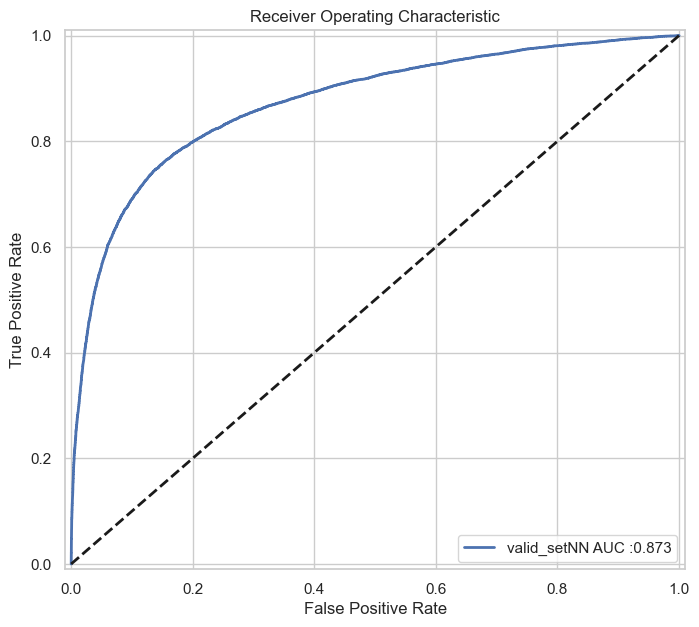

2025-06-04 15:52:26,265 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:52:26,281 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:52:26,651 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:52:26,671 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  679.7167177750154
sum_bkg_weights:  105039.28328222499


2025-06-04 15:52:27,018 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:52:27,034 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  675.8086089577715
sum_bkg_weights:  105043.19139104223


2025-06-04 15:52:27,386 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:52:27,448 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  664.7107946124917
sum_bkg_weights:  105054.28920538754
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
16
Epoch 1/5
3125/3125 - 7s - 2ms/step - accuracy: 0.7905 - loss: 2.0216
Epoch 2/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8092 - loss: 1.9111
Epoch 3/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8151 - loss: 1.8798
Epoch 4/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8180 - loss: 1.8630
Epoch 5/5
3125/3125 - 6s - 2ms/step - accuracy: 0.8186 - loss: 1.8491
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45804,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45804,)
score shape after threshold (45804,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step
predictions.shape: (45804,)
labels.shape: ()
weights.shape: ()
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step
predictions.shape: (45804,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.

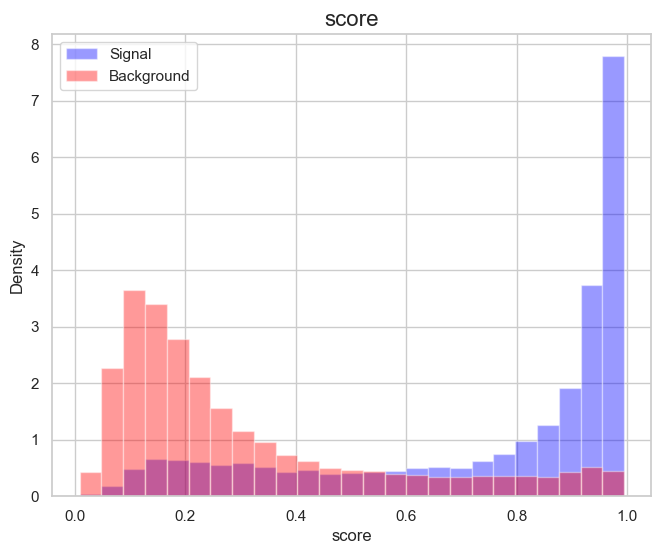

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


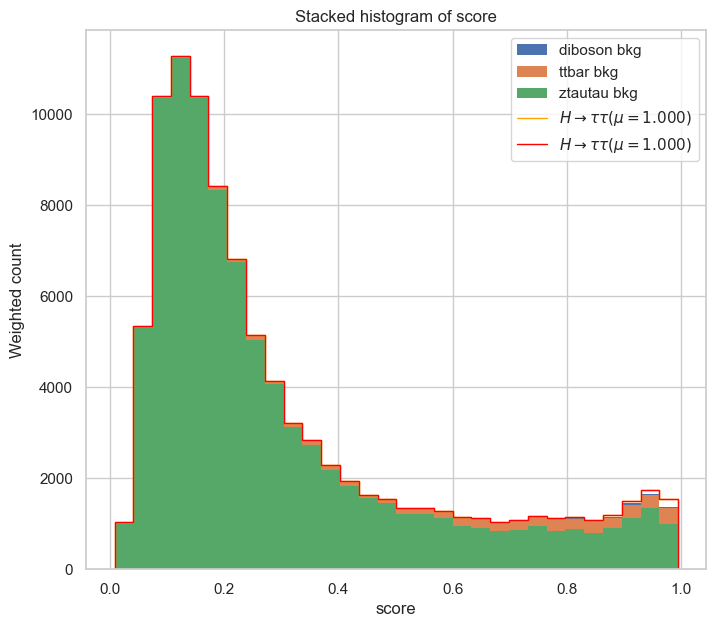

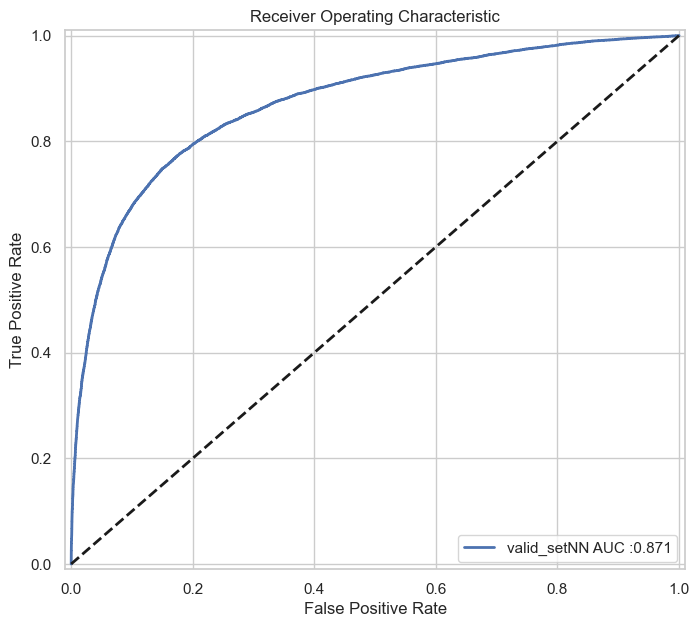

2025-06-04 15:53:11,446 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:53:11,464 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:53:11,830 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:53:11,845 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  675.3794354427745
sum_bkg_weights:  105043.62056455722


2025-06-04 15:53:12,208 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:53:12,223 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  671.9438269486639
sum_bkg_weights:  105047.05617305131


2025-06-04 15:53:12,598 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:53:12,663 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  672.8570774420907
sum_bkg_weights:  105046.1429225579
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
32
Epoch 1/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7892 - loss: 2.0327
Epoch 2/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8066 - loss: 1.9225
Epoch 3/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8097 - loss: 1.8969
Epoch 4/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8133 - loss: 1.8793
Epoch 5/5
1563/1563 - 3s - 2ms/step - accuracy: 0.8167 - loss: 1.8673
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45878,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45878,)
score shape after threshold (45878,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45878,)
labels.shape: ()
weights.shape: ()
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45878,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.float

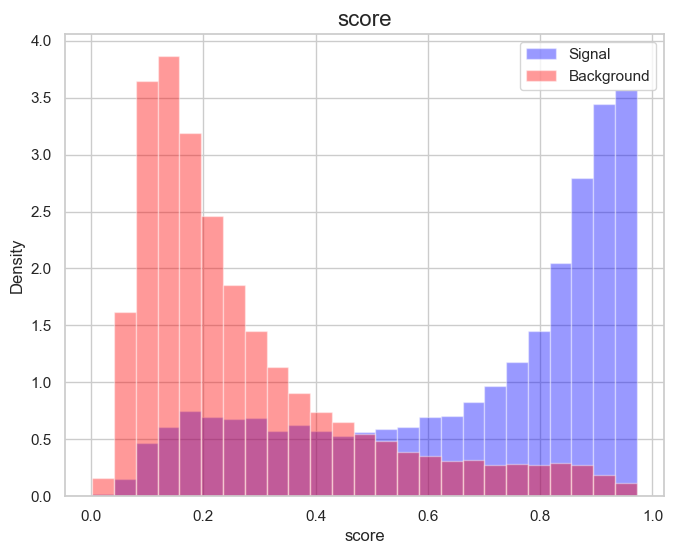

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


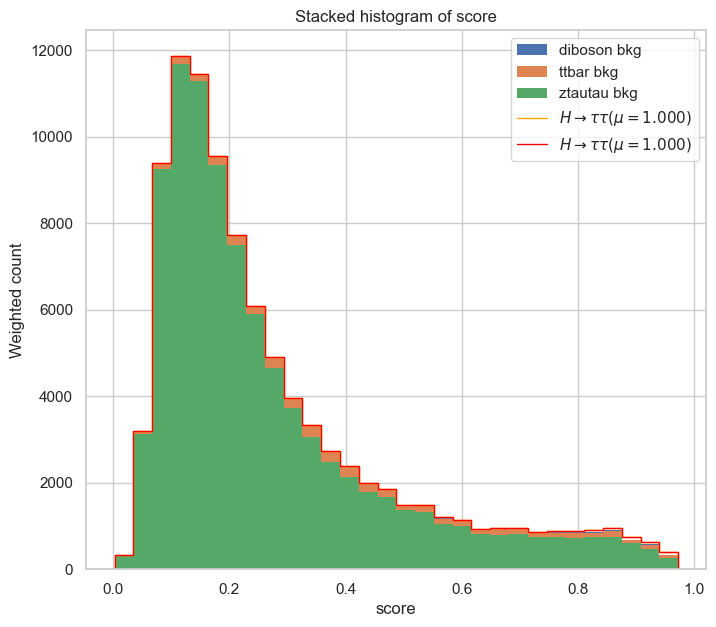

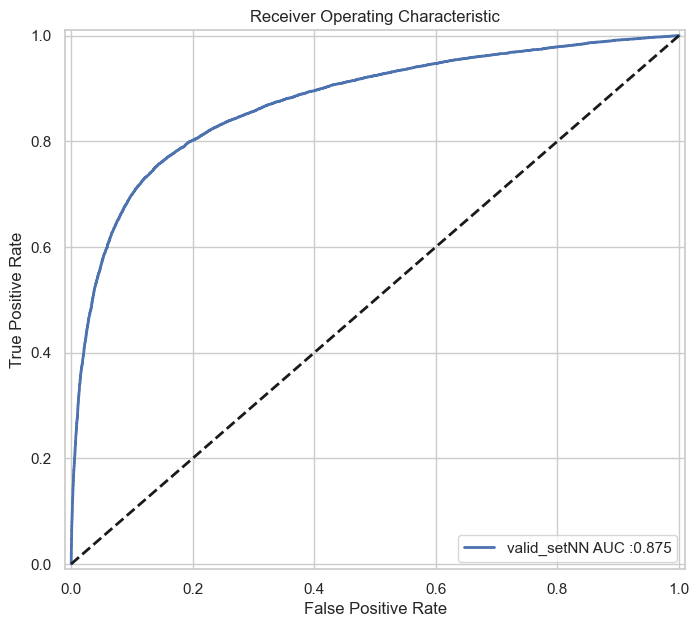

2025-06-04 15:53:44,305 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:53:44,314 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:53:44,700 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:53:44,717 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  673.5920674107061
sum_bkg_weights:  105045.40793258928


2025-06-04 15:53:45,138 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:53:45,164 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  669.2322588397362
sum_bkg_weights:  105049.76774116023


2025-06-04 15:53:45,526 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:53:45,567 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  677.3690247251207
sum_bkg_weights:  105041.63097527491
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
64
Epoch 1/5
782/782 - 3s - 4ms/step - accuracy: 0.7867 - loss: 2.0396
Epoch 2/5
782/782 - 2s - 2ms/step - accuracy: 0.8071 - loss: 1.9119
Epoch 3/5
782/782 - 2s - 2ms/step - accuracy: 0.8123 - loss: 1.8895
Epoch 4/5
782/782 - 2s - 2ms/step - accuracy: 0.8143 - loss: 1.8683
Epoch 5/5
782/782 - 2s - 2ms/step - accuracy: 0.8175 - loss: 1.8569
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45795,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45795,)
score shape after threshold (45795,)
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45795,)
labels.shape: ()
weights.shape: ()
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45795,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.float64(15710.

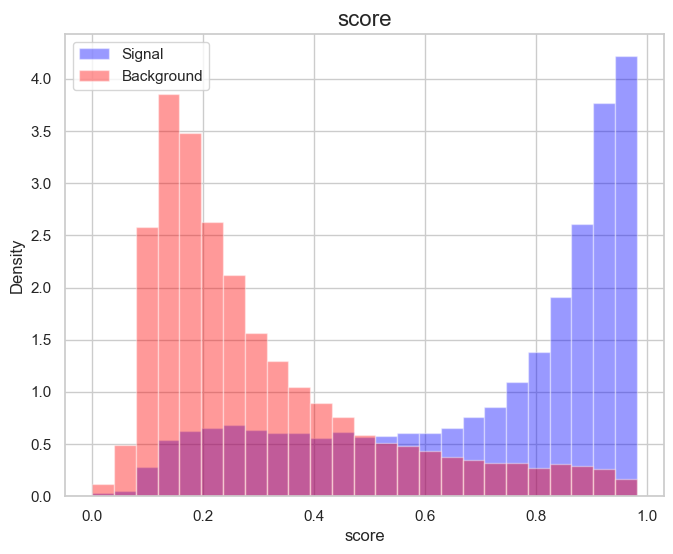

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


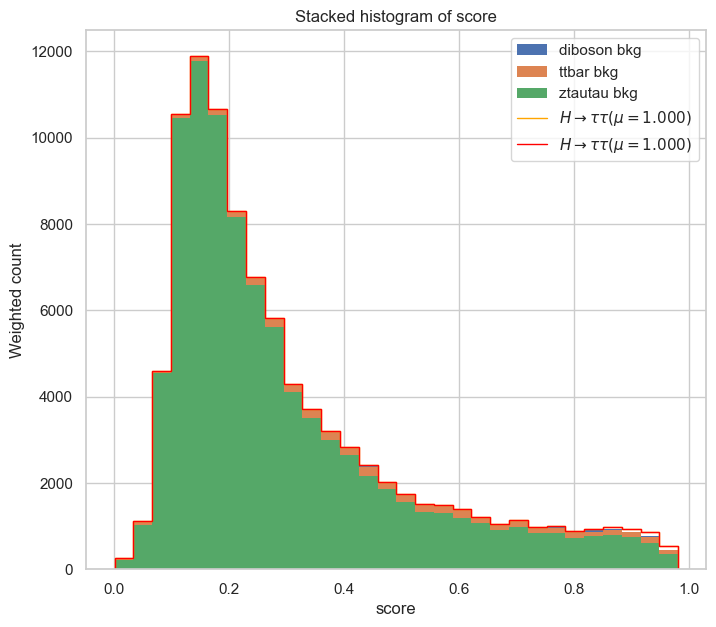

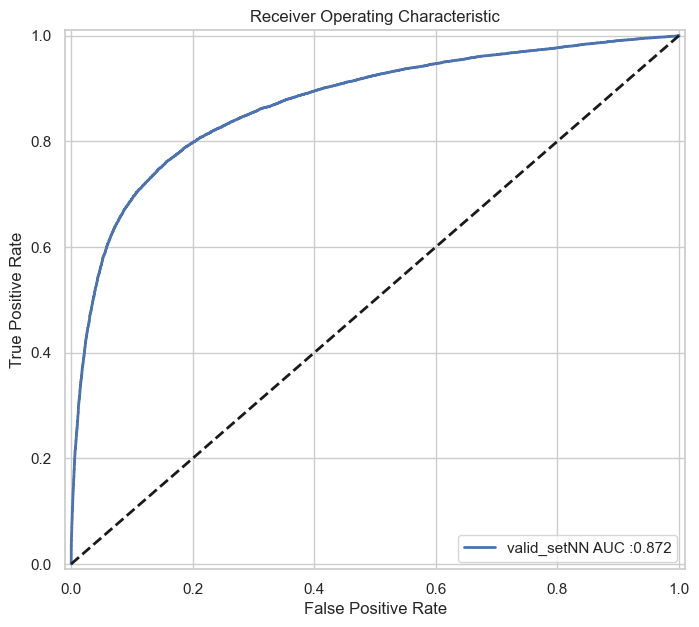

2025-06-04 15:54:10,520 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:54:10,528 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:54:10,933 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:10,956 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  674.7201327934958
sum_bkg_weights:  105044.27986720647


2025-06-04 15:54:11,404 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:11,434 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  671.7001565858874
sum_bkg_weights:  105047.29984341412


2025-06-04 15:54:11,835 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:11,895 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.7592734842499
sum_bkg_weights:  105045.24072651577
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
128
Epoch 1/5
391/391 - 2s - 6ms/step - accuracy: 0.7689 - loss: 2.1085
Epoch 2/5
391/391 - 1s - 2ms/step - accuracy: 0.8042 - loss: 1.9326
Epoch 3/5
391/391 - 1s - 2ms/step - accuracy: 0.8115 - loss: 1.8900
Epoch 4/5
391/391 - 1s - 2ms/step - accuracy: 0.8139 - loss: 1.8707
Epoch 5/5
391/391 - 1s - 2ms/step - accuracy: 0.8170 - loss: 1.8562
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45868,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45868,)
score shape after threshold (45868,)
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45868,)
labels.shape: ()
weights.shape: ()
1434/1434 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45868,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.float64(15840

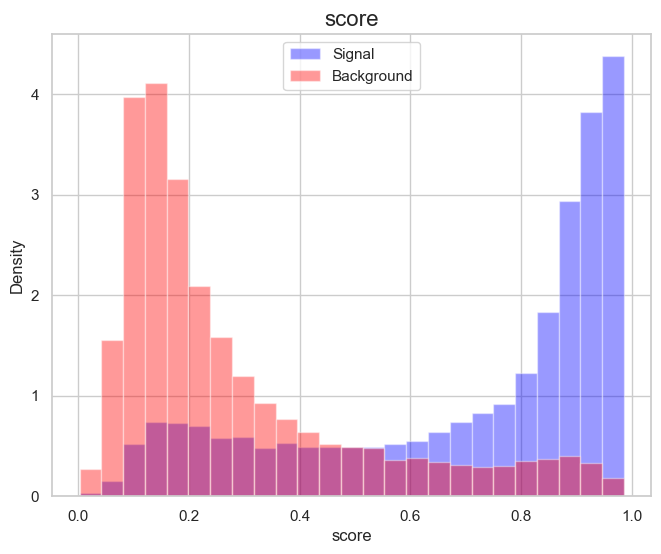

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


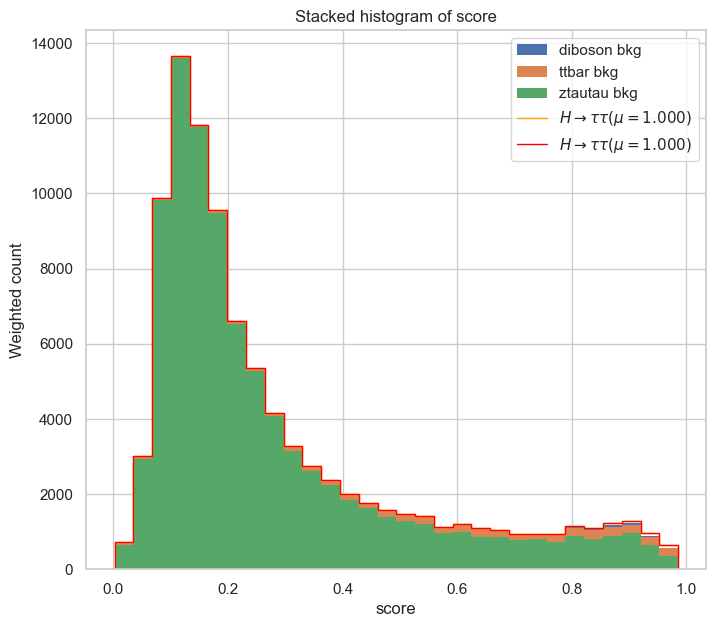

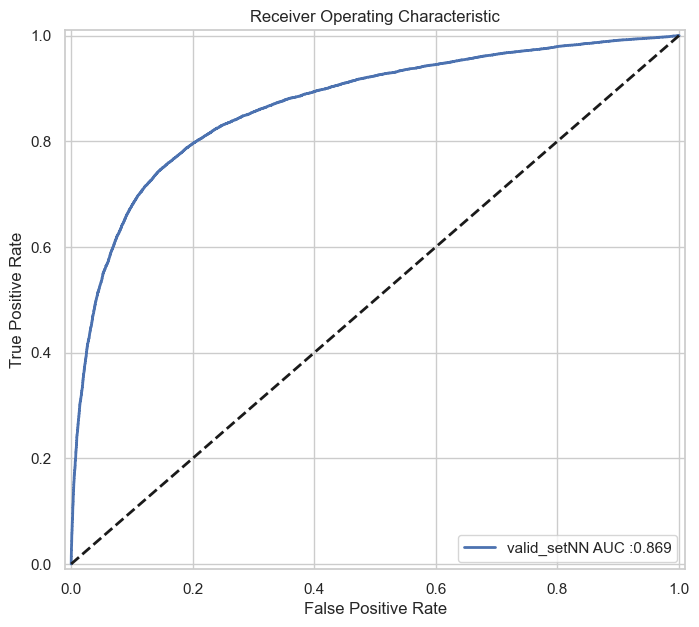

2025-06-04 15:54:33,950 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:54:33,957 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:54:34,376 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:34,412 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  675.391163870802
sum_bkg_weights:  105043.60883612916


2025-06-04 15:54:34,832 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:34,865 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  670.3266577600799
sum_bkg_weights:  105048.67334223991


2025-06-04 15:54:35,277 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:35,356 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  674.4664070987636
sum_bkg_weights:  105044.53359290127
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
256
Epoch 1/5
196/196 - 2s - 10ms/step - accuracy: 0.7696 - loss: 2.1345
Epoch 2/5
196/196 - 1s - 3ms/step - accuracy: 0.8013 - loss: 1.9482
Epoch 3/5
196/196 - 1s - 3ms/step - accuracy: 0.8048 - loss: 1.9152
Epoch 4/5
196/196 - 1s - 3ms/step - accuracy: 0.8106 - loss: 1.8888
Epoch 5/5
196/196 - 1s - 3ms/step - accuracy: 0.8108 - loss: 1.8745
1430/1430 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45755,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45755,)
score shape after threshold (45755,)
1430/1430 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45755,)
labels.shape: ()
weights.shape: ()
1430/1430 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45755,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.float64(1528

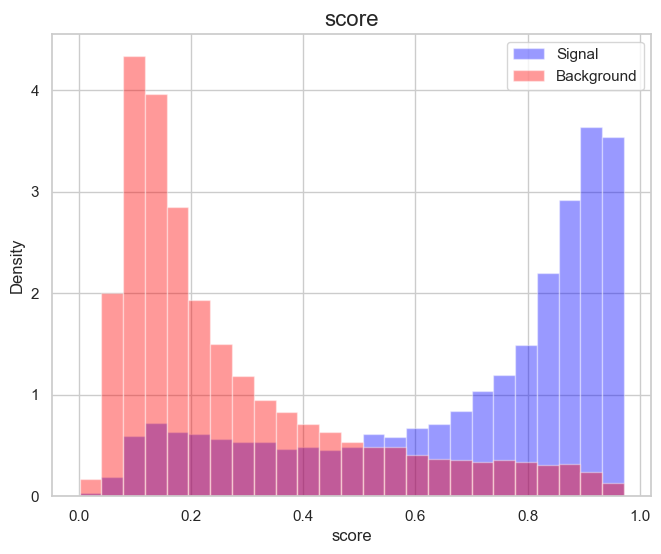

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


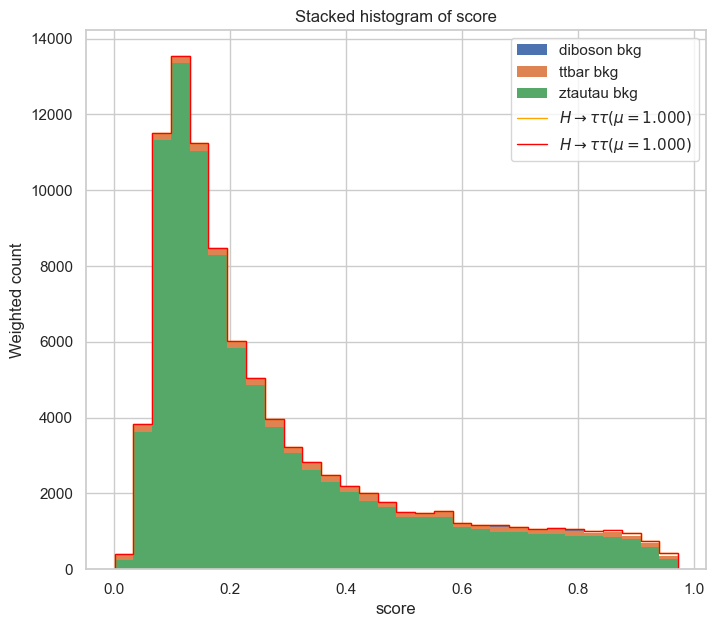

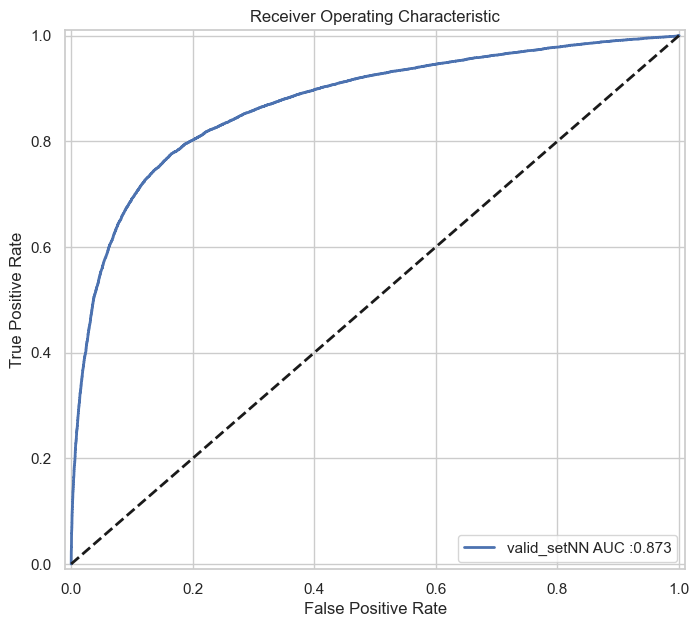

2025-06-04 15:54:56,615 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:54:56,623 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:54:56,987 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:57,015 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  678.5988328290543
sum_bkg_weights:  105040.40116717097


2025-06-04 15:54:57,429 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:57,464 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  669.6111818701218
sum_bkg_weights:  105049.38881812987


2025-06-04 15:54:57,915 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:54:57,979 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  671.9882129115231
sum_bkg_weights:  105047.01178708844
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
512
Epoch 1/5
98/98 - 2s - 17ms/step - accuracy: 0.7557 - loss: 2.2152
Epoch 2/5
98/98 - 0s - 3ms/step - accuracy: 0.7946 - loss: 1.9701
Epoch 3/5
98/98 - 0s - 3ms/step - accuracy: 0.8048 - loss: 1.9211
Epoch 4/5
98/98 - 0s - 3ms/step - accuracy: 0.8086 - loss: 1.8910
Epoch 5/5
98/98 - 0s - 3ms/step - accuracy: 0.8126 - loss: 1.8757
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45774,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45774,)
score shape after threshold (45774,)
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
predictions.shape: (45774,)
labels.shape: ()
weights.shape: ()
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45774,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.float64(15911.211079

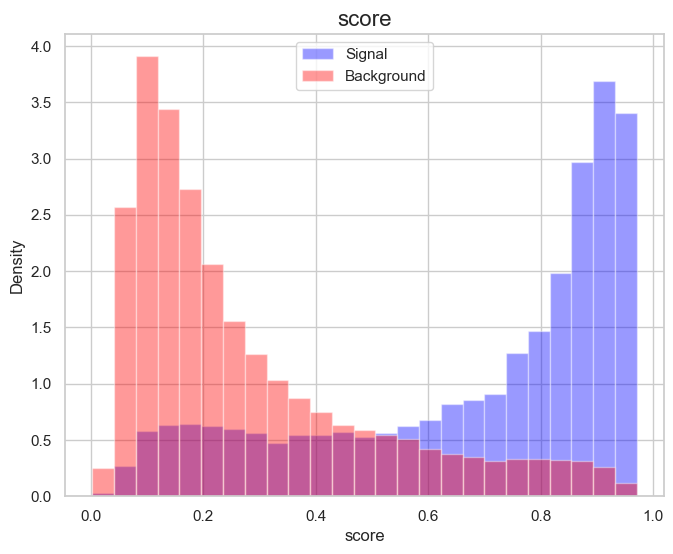

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


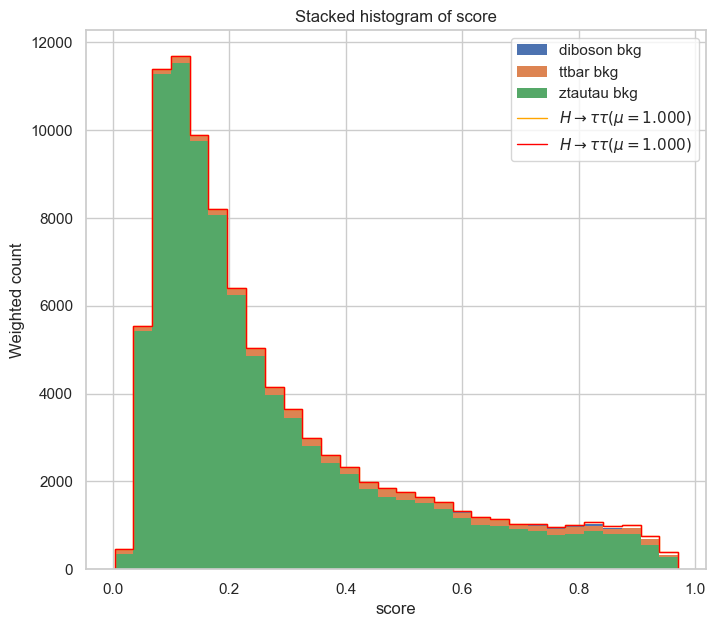

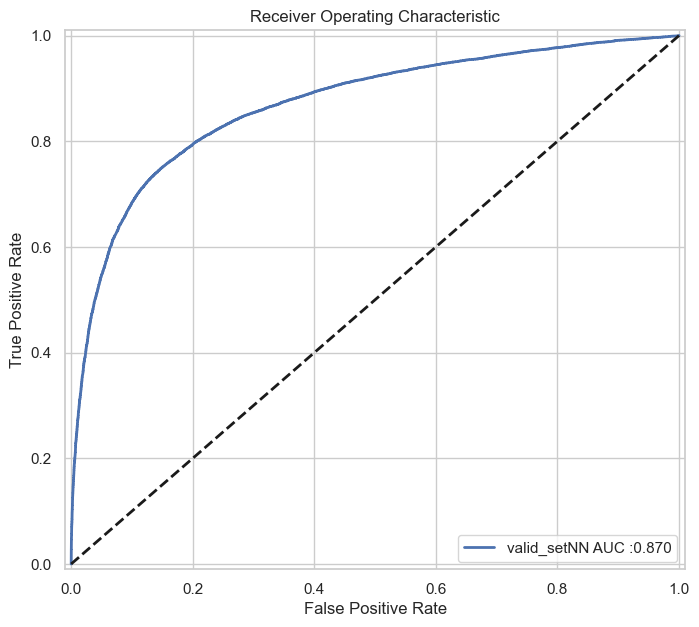

2025-06-04 15:55:15,906 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:55:15,922 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:55:16,297 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:55:16,324 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  672.3896553298208
sum_bkg_weights:  105046.61034467019


2025-06-04 15:55:16,674 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:55:16,705 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  674.66980126805
sum_bkg_weights:  105044.33019873193


2025-06-04 15:55:17,065 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:55:17,129 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  673.1190779231752
sum_bkg_weights:  105045.88092207685
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
1024
Epoch 1/5
49/49 - 1s - 30ms/step - accuracy: 0.7211 - loss: 2.3720
Epoch 2/5
49/49 - 0s - 6ms/step - accuracy: 0.7806 - loss: 2.0721
Epoch 3/5
49/49 - 0s - 7ms/step - accuracy: 0.7906 - loss: 1.9998
Epoch 4/5
49/49 - 0s - 5ms/step - accuracy: 0.7975 - loss: 1.9569
Epoch 5/5
49/49 - 0s - 5ms/step - accuracy: 0.8007 - loss: 1.9340
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45903,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45903,)
score shape after threshold (45903,)
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45903,)
labels.shape: ()
weights.shape: ()
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
predictions.shape: (45903,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.float64(17835.4434239

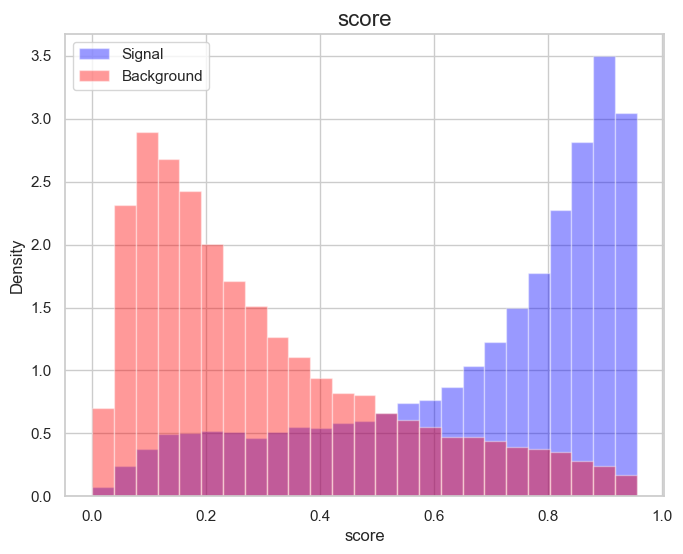

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


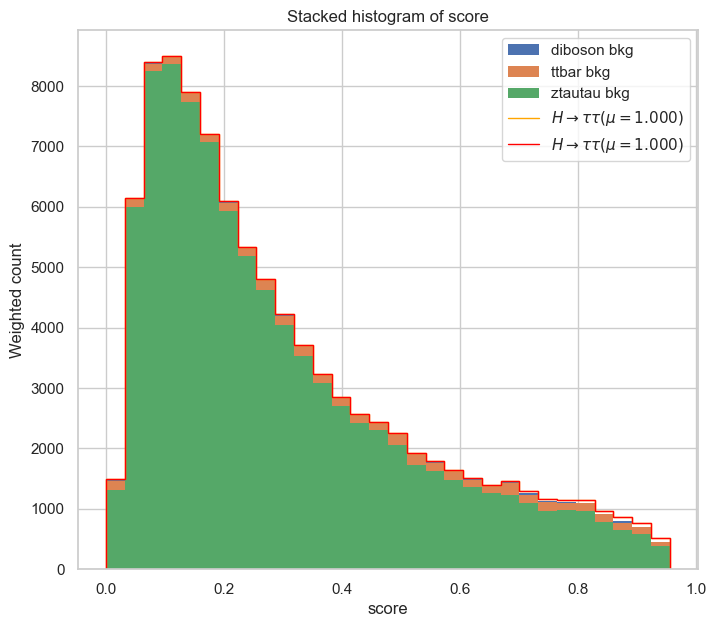

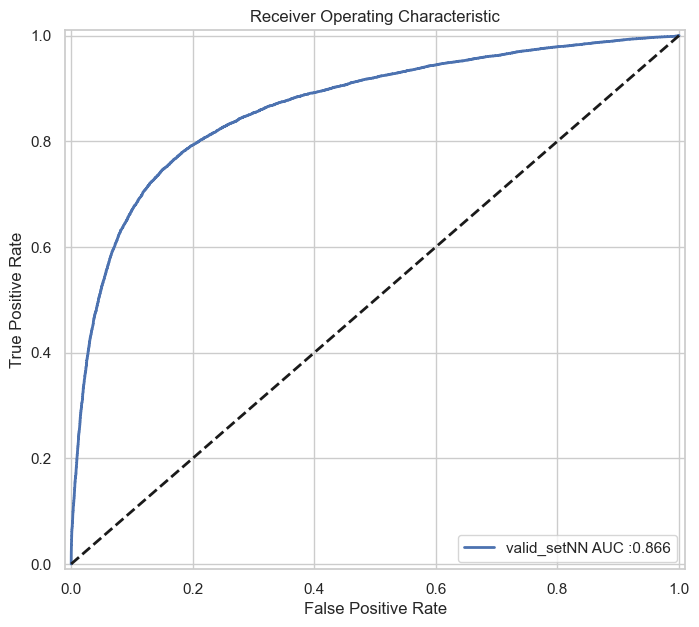

2025-06-04 15:55:35,039 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 15:55:35,055 - HiggsML.datasets     - INFO     - Selected train size: 50000
2025-06-04 15:55:35,429 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:55:35,462 - HiggsML.datasets     - INFO     - Selected train size: 50000


Training Data:  (50000, 28)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  674.0156582965523
sum_bkg_weights:  105044.98434170341


2025-06-04 15:55:35,879 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:55:35,908 - HiggsML.datasets     - INFO     - Selected train size: 50000



Valid Data:  (50000, 28)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  668.8452823773893
sum_bkg_weights:  105050.15471762259


2025-06-04 15:55:36,285 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 15:55:36,350 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model



Holdout Data:  (50000, 28)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  677.3341308700403
sum_bkg_weights:  105041.66586912997
 
 
Training Data:  (50000, 28)
DEBUG: model_type = 'NN'
 Model is NN
2048
Epoch 1/5
25/25 - 1s - 54ms/step - accuracy: 0.6560 - loss: 2.6246
Epoch 2/5
25/25 - 0s - 7ms/step - accuracy: 0.7584 - loss: 2.2525
Epoch 3/5
25/25 - 0s - 6ms/step - accuracy: 0.7759 - loss: 2.1119
Epoch 4/5
25/25 - 0s - 7ms/step - accuracy: 0.7854 - loss: 2.0378
Epoch 5/5
25/25 - 0s - 9ms/step - accuracy: 0.7891 - loss: 1.9941
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step
predictions.shape: (45786,)
labels.shape: ()
weights.shape: ()
score shape before threshold (45786,)
score shape after threshold (45786,)
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step
predictions.shape: (45786,)
labels.shape: ()
weights.shape: ()
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
predictions.shape: (45786,)
labels.shape: ()
weights.shape: ()
saved_info {'beta': np.float64(19062.7

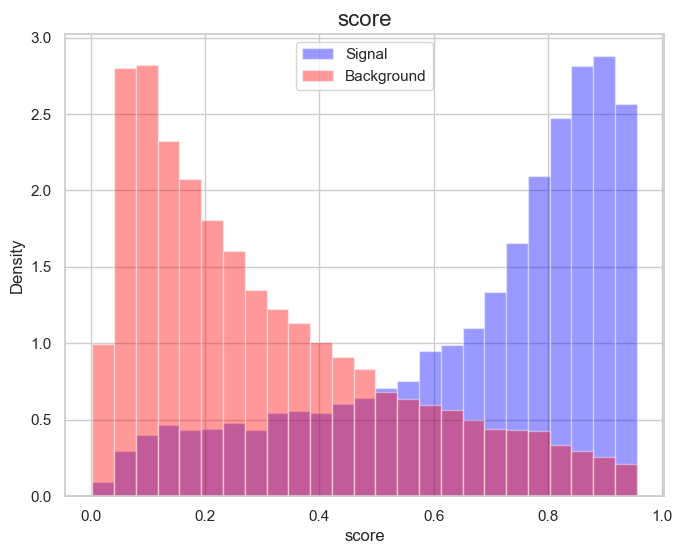

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


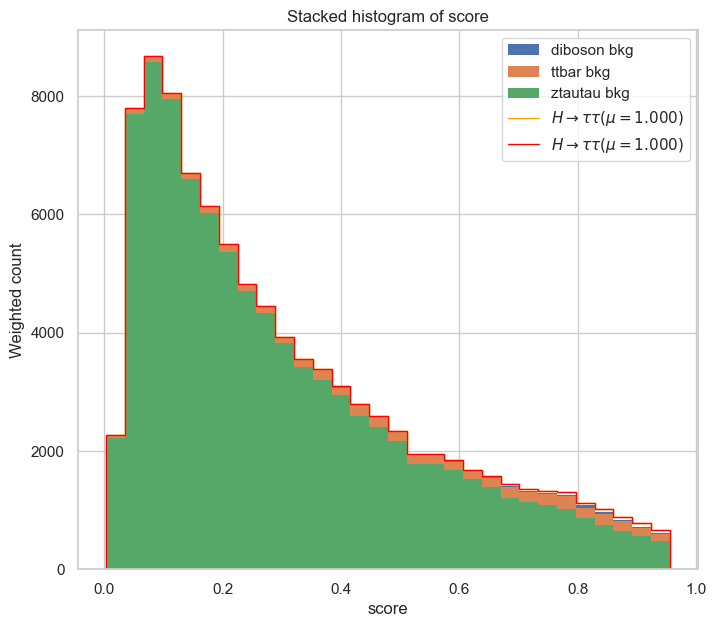

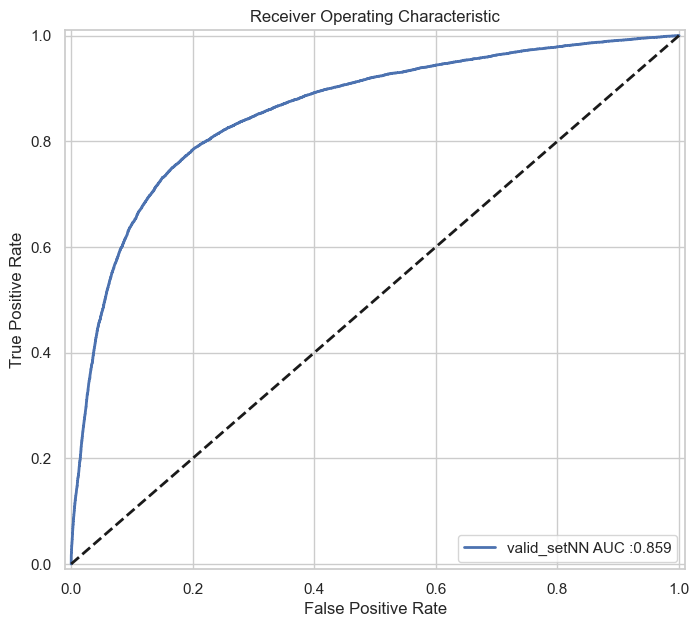

(np.float64(2.104951270213177), 16)

In [9]:
optimization(data_set)